(test-functions:ackley)=
# Ackley Function

The Ackley function  is an $M$-dimensional scalar-valued function.
The function was first introduced by Ackley {cite}`Ackley1987`
as a test function for optimization algorithms.
Originally presented as a two-dimensional function,
it was later generalized by Bäck and Schwefel {cite}`Baeck1993`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

The plots for one-dimensional and two-dimensional Ackley function are shown below.
As can be seen, the function features many local optima with a single global optima.

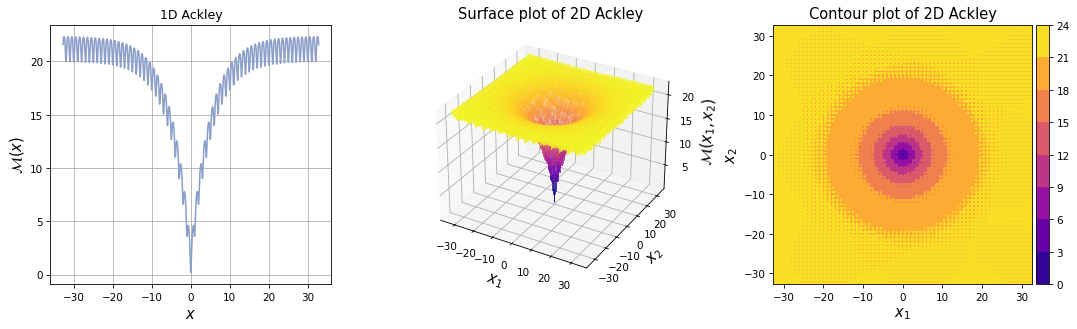

In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Create 1D data from Ackley
my_ackley_1d = uqtf.Ackley(spatial_dimension=1)
xx_1d = np.linspace(-32.768, 32.768, 1000)[:, np.newaxis]
yy_1d = my_ackley_1d(xx_1d)

# --- Create 2D data from Ackley
my_ackley_2d = uqtf.Ackley(spatial_dimension=2)
mesh_2d = np.meshgrid(xx_1d, xx_1d)
xx_2d = np.array(mesh_2d).T.reshape(-1, 2)
yy_2d = my_ackley_2d(xx_2d)

# --- Create two-dimensional plots
fig = plt.figure(figsize=(15, 5))

# 1D
axs_1 = plt.subplot(131)
axs_1.plot(xx_1d, yy_1d, color="#8da0cb")
axs_1.grid()
axs_1.set_xlabel("$x$", fontsize=14)
axs_1.set_ylabel("$\mathcal{M}(x)$", fontsize=14)
axs_1.set_title("1D Ackley")

# Surface
axs_2 = plt.subplot(132, projection='3d')
axs_2.plot_surface(
    mesh_2d[0],
    mesh_2d[1],
    yy_2d.reshape(1000,1000).T,
    linewidth=0,
    cmap="plasma",
    antialiased=False,
    alpha=0.5
)
axs_2.set_xlabel("$x_1$", fontsize=14)
axs_2.set_ylabel("$x_2$", fontsize=14)
axs_2.set_zlabel("$\mathcal{M}(x_1, x_2)$", fontsize=14)
axs_2.set_title("Surface plot of 2D Ackley", fontsize=14)

# Contour
axs_3 = plt.subplot(133)
cf = axs_3.contourf(
    mesh_2d[0], mesh_2d[1], yy_2d.reshape(1000, 1000).T, cmap="plasma"
)
axs_3.set_xlabel("$x_1$", fontsize=14)
axs_3.set_ylabel("$x_2$", fontsize=14)
axs_3.set_title("Contour plot of 2D Ackley", fontsize=14)
divider = make_axes_locatable(axs_3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(cf, cax=cax, orientation='vertical')
axs_3.axis('scaled')

fig.tight_layout(pad=3.0)
plt.gcf().set_dpi(75);

## Test function instance  
  
To create a default instance of the Ackley test function, type:

In [3]:
my_testfun = uqtf.Ackley()

  
Check if it has been correctly instantiated:

In [4]:
print(my_testfun)

Name              : Ackley
Spatial dimension : 2
Description       : Optimization test function from Ackley (1987)


  
By default, the spatial dimension is set to $2$[^default_dimension].
To create an instance with another value of spatial dimension,
pass an integer to the parameter `spatial_dimension` (keyword only).
For example, to create an instance of 10-dimensional Ackley function, type:

In [5]:
my_testfun = uqtf.Ackley(spatial_dimension=10)

In the subsequent section, this 10-dimensional Ackley function will be used
for illustration.

## Description

The generalized Ackley function according to {cite}`Baeck1993` is defined
as follows:

$$
\mathcal{M}(\boldsymbol{x}) = -a_1 \exp \left[ -a_2 \sqrt{\frac{1}{M} \sum_{m=1}^M x_m^2} \right] - \exp \left[ \frac{1}{M} \sum_{m=1}^M \cos (a_3 x_m) \right] + a_1 + e
$$

where $\boldsymbol{x} = \{ x_1, \ldots, x_M \}$ is the $M$-dimensional vector of
input variables further defined below, and
$\boldsymbol{a} = \{ a_1, a_2, a_3 \}$ are parameters of the function.

## Input

Based on {cite}`Ackley1987`, the search domain of the Ackley function is
in $[-32.768, 32.768]^M$.
In UQTestFuns, this search domain can be represented as probabilistic input
using the uniform distribution with marginals shown in the table below.

In [6]:
my_testfun.prob_input

ProbInput(spatial_dimension=10, marginals=(UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X1', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X2', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X3', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X4', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X5', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X6', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X7', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X8', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X9', description='None'), UnivDist(distribution='uniform', parameters=array([-32.768,  32.768]), name='X10', description='None')), copulas=None, name='Ackley1987', description='Search domain for the Ackley function from Ackley (1987).')

## Parameters

The Ackley function requires three additional parameters
to complete the specification.
The recommended (and the default) values are $a_1 = 20, a_2 = 0.2, a_3 = 2 \pi$.

## Reference results

This section provides several reference results related to the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

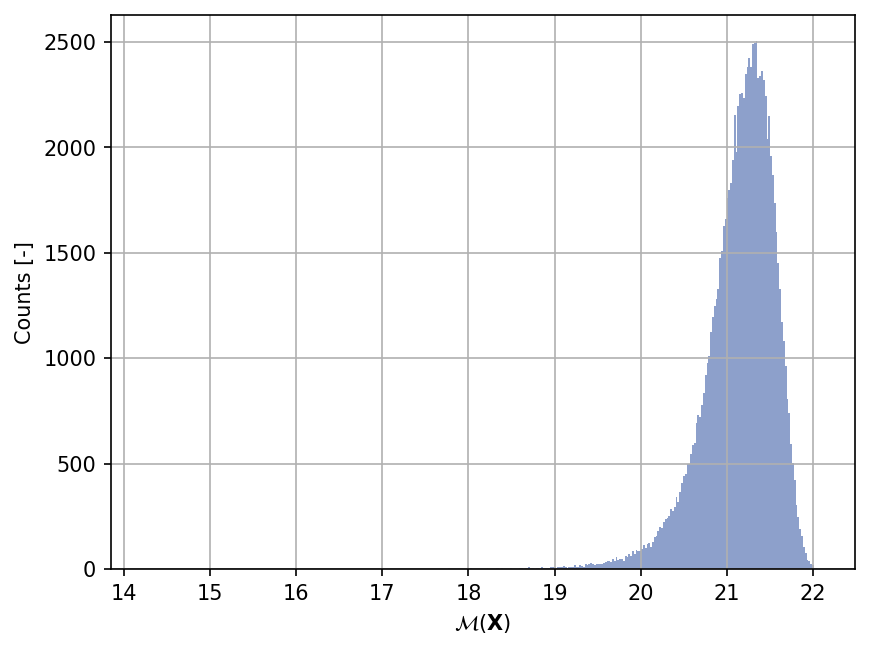

In [7]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

### Optimum values

The global optimum value of the Ackley function is
$\mathcal{M}(\boldsymbol{x}^*) = 0$ at $x_m^* = 0,\, m = 1, \ldots, M$.

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```

[^default_dimension]: This default dimension applies to all variable dimension
test functions. It will be used if the `spatial_dimension` argument is not given.